In [2]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
Embeddings_ABCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-10-30/11-29-00/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-10-30/11-29-00/hcp/Embeddings.csv")
Embeddings_epilepsy= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-10-30/11-29-00/epilepsy_PBS/Embeddings.csv")

In [4]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [5]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]
epilepsy_irm_neg= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_negatives_centrales"]
epilepsy_irm_pos= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_positives_centrales"]

In [6]:
#We rename the first colomn 

Embeddings_epilepsy  = Embeddings_epilepsy.rename(columns={Embeddings_epilepsy.columns[0]: "Index"})


In [7]:
Embeddings_controls = Embeddings_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Embeddings_irm_negatives = Embeddings_epilepsy.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Embeddings_irm_positives = Embeddings_epilepsy.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

In [8]:
Embeddings_ABCD

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,NDARINV003RTV85,0.577459,1.122655,-0.753655,0.531176,1.271444,-0.247799,-1.381501,0.357245,0.874297,...,0.638798,-1.086029,-0.040774,0.385830,0.206433,-0.378505,0.507670,-0.748024,0.867729,0.694803
1,NDARINV007W6H7B,0.578508,-0.997328,0.834522,-0.343528,-0.642676,-1.171143,1.734612,1.211283,0.797437,...,-0.264901,1.238715,-0.118876,2.112737,-0.910881,0.123049,0.125549,-0.677875,-1.537511,0.188672
2,NDARINV00BD7VDC,-0.389576,-1.267658,-1.170386,1.021155,1.241622,-0.920019,0.907003,-0.411759,0.372972,...,0.710321,-0.929687,0.544070,0.057873,-0.748259,0.628073,-1.466100,0.349301,1.090932,0.286283
3,NDARINV00HEV6HB,-0.421020,0.322194,-1.896813,1.607172,-0.101475,0.061855,-1.336314,-1.319104,0.070264,...,-1.145381,-0.193820,0.222549,2.396184,-0.522565,-0.543853,1.403191,-0.497742,-0.667886,0.531768
4,NDARINV00J52GPG,1.721971,-0.255735,-1.018330,-0.944211,-0.492510,0.491619,0.842006,1.001722,-0.633269,...,-0.796462,1.615537,-1.616296,0.507785,-1.663479,-0.612448,-0.080110,0.036737,-0.684281,0.428005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,NDARINVZZLZCKAY,0.444423,-1.842361,0.666000,0.497728,2.205683,-0.045660,-1.991617,-0.286747,-1.116686,...,0.625235,-0.643935,0.056597,-0.104727,-1.898771,0.632597,-0.049102,1.001445,-0.503240,0.698426
10133,NDARINVZZPKBDAC,0.747784,0.424998,1.711157,1.739408,-0.022833,-0.969671,1.668566,0.012081,-0.134356,...,1.269744,-0.199417,-0.800195,0.113280,-0.440297,-0.173047,-0.608310,1.460341,1.132461,0.480227
10134,NDARINVZZZ2ALR6,0.436607,0.786768,-0.909906,1.743068,0.634827,0.205257,-2.410483,-0.296468,-0.744477,...,0.876953,-1.128018,1.038086,0.031570,-0.254610,0.993725,-1.121745,0.072221,-1.281249,0.558265
10135,NDARINVZZZNB0XC,1.708050,-0.265938,0.254141,-0.044025,-0.579862,-0.055230,0.537206,-0.723083,-0.763988,...,-1.595955,-0.922338,1.673835,0.952975,0.219799,-1.202746,0.423545,0.452701,-0.960072,2.623506


In [9]:
X1 = Embeddings_ABCD.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_controls.iloc[:,1:76]
X4= Embeddings_irm_negatives.iloc[:,1:76]
X5= Embeddings_irm_positives.iloc[:,1:76]

In [10]:
X1

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.577459,1.122655,-0.753655,0.531176,1.271444,-0.247799,-1.381501,0.357245,0.874297,1.175453,...,0.638798,-1.086029,-0.040774,0.385830,0.206433,-0.378505,0.507670,-0.748024,0.867729,0.694803
1,0.578508,-0.997328,0.834522,-0.343528,-0.642676,-1.171143,1.734612,1.211283,0.797437,-1.520643,...,-0.264901,1.238715,-0.118876,2.112737,-0.910881,0.123049,0.125549,-0.677875,-1.537511,0.188672
2,-0.389576,-1.267658,-1.170386,1.021155,1.241622,-0.920019,0.907003,-0.411759,0.372972,-2.603603,...,0.710321,-0.929687,0.544070,0.057873,-0.748259,0.628073,-1.466100,0.349301,1.090932,0.286283
3,-0.421020,0.322194,-1.896813,1.607172,-0.101475,0.061855,-1.336314,-1.319104,0.070264,-0.982458,...,-1.145381,-0.193820,0.222549,2.396184,-0.522565,-0.543853,1.403191,-0.497742,-0.667886,0.531768
4,1.721971,-0.255735,-1.018330,-0.944211,-0.492510,0.491619,0.842006,1.001722,-0.633269,1.666614,...,-0.796462,1.615537,-1.616296,0.507785,-1.663479,-0.612448,-0.080110,0.036737,-0.684281,0.428005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,0.444423,-1.842361,0.666000,0.497728,2.205683,-0.045660,-1.991617,-0.286747,-1.116686,1.511392,...,0.625235,-0.643935,0.056597,-0.104727,-1.898771,0.632597,-0.049102,1.001445,-0.503240,0.698426
10133,0.747784,0.424998,1.711157,1.739408,-0.022833,-0.969671,1.668566,0.012081,-0.134356,-0.556603,...,1.269744,-0.199417,-0.800195,0.113280,-0.440297,-0.173047,-0.608310,1.460341,1.132461,0.480227
10134,0.436607,0.786768,-0.909906,1.743068,0.634827,0.205257,-2.410483,-0.296468,-0.744477,-0.503093,...,0.876953,-1.128018,1.038086,0.031570,-0.254610,0.993725,-1.121745,0.072221,-1.281249,0.558265
10135,1.708050,-0.265938,0.254141,-0.044025,-0.579862,-0.055230,0.537206,-0.723083,-0.763988,-0.318688,...,-1.595955,-0.922338,1.673835,0.952975,0.219799,-1.202746,0.423545,0.452701,-0.960072,2.623506


In [11]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2=scaler.transform(X2)
X3=scaler.transform(X3)
X4=scaler.transform(X4)
X5=scaler.transform(X5)

In [12]:
import statsmodels.api as sm

In [13]:
L= np.concatenate((X1,X2,X3,X4,X5), axis=0)

covariates = pd.DataFrame({
    'Site': ['UKB']*len(X1) 
            + ['hcp']*len(X2) 
            + ['epilepsy_PBS']*(len(X3)+len(X4)+len(X5))
})

In [14]:
covariates

,Site
0,UKB
1,UKB
2,UKB
3,UKB
4,UKB
...,...
11303,epilepsy_PBS
11304,epilepsy_PBS
11305,epilepsy_PBS
11306,epilepsy_PBS


In [15]:
covariates = pd.get_dummies(covariates)
covariates

,Site_UKB,Site_epilepsy_PBS,Site_hcp
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
11303,False,True,False
11304,False,True,False
11305,False,True,False
11306,False,True,False


In [16]:
covariates_train= covariates.head(len(X1)+len(X2)+len(X3))
covariates_test= covariates.iloc[len(X1)+len(X2)+len(X3):]

L_train=np.concatenate((X1,X2,X3), axis=0)
L_test= np.concatenate((X4,X5), axis=0)

In [17]:
covariates = sm.add_constant(covariates)  # Add intercept

L1_resid = np.zeros_like(L_train)
L2_resid = np.zeros_like(L_test)

for j in range(L_train.shape[1]):
    model = sm.OLS(L_train[:, j].astype(float), covariates_train.astype(float)).fit()
    L1_resid[:, j] = model.resid 
    L2_resid[:, j] = L_test[:,j] - model.predict(covariates_test)


In [18]:
X_ukb = L1_resid[:len(X1),:]
X_hcp = L1_resid[len(X1):len(X1)+len(X2),:]
X_control= L1_resid[len(X1)+len(X2):,:]
X_neg= L2_resid[:len(X4),:]
X_pos=L2_resid[len(X4):,:]


In [19]:
def proportion_positive(L):
    n_total = len(L)
    n_pos = np.sum(L == 1)

    return n_pos / n_total

One-class SVM

In [20]:
from sklearn.svm import OneClassSVM

In [21]:
nu= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for u in nu:
    print(u)
    clf = OneClassSVM(kernel='rbf', gamma='scale', nu=u)
    clf.fit(X_ukb)

    y1 = clf.predict(X_ukb)
    y2 = clf.predict(X_hcp)
    y3 = clf.predict(X_control)
    y4 = clf.predict(X_neg)
    y5 = clf.predict(X_pos)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos)

0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16
0.18
0.19999999999999998
0.22
0.24
0.26
0.28
0.30000000000000004


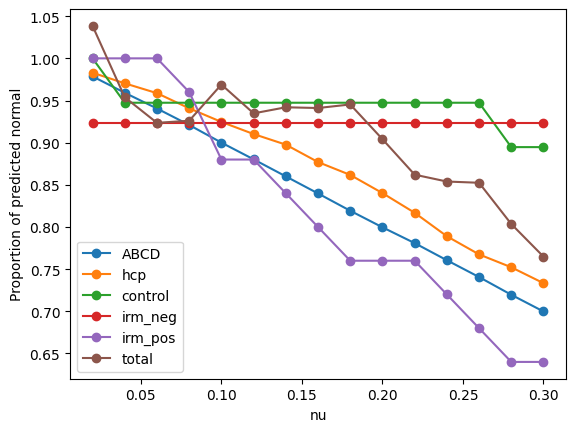

In [22]:
plt.plot(nu, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(nu, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(nu, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(nu, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(nu, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(nu, total, marker='o', linestyle='-', label="total")

plt.xlabel("nu")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

Isolation forest

In [23]:
from sklearn.ensemble import IsolationForest

In [24]:
contamination= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for a in contamination:

    clf = IsolationForest(contamination=a, random_state=42)
    clf.fit(X_ukb)

    y1 = clf.predict(X_ukb)
    y2 = clf.predict(X_hcp)
    y3 = clf.predict(X_control)
    y4 = clf.predict(X_neg)
    y5 = clf.predict(X_pos)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos) 

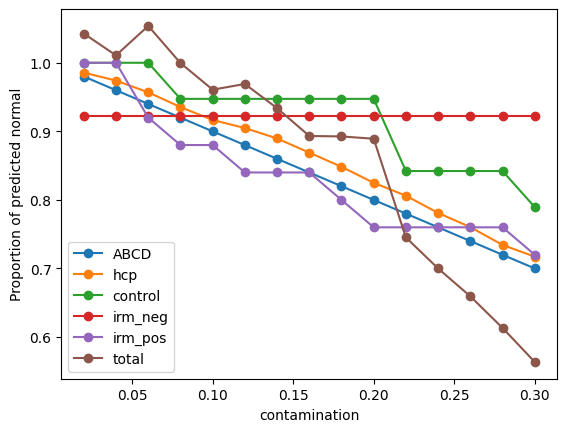

In [25]:
plt.plot(contamination, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(contamination, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(contamination, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(contamination, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(contamination, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(contamination, total, marker='o', linestyle='-', label="total")

plt.xlabel("contamination")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

LOF

In [26]:
from sklearn.neighbors import LocalOutlierFactor

In [27]:
contamination= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for a in contamination:

    lof = LocalOutlierFactor(contamination=a, novelty=True)
    lof.fit(X_ukb)
    y1 = lof.predict(X_ukb)
    y2 = lof.predict(X_hcp)
    y3 = lof.predict(X_control)
    y4 = lof.predict(X_neg)
    y5 = lof.predict(X_pos)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos) 


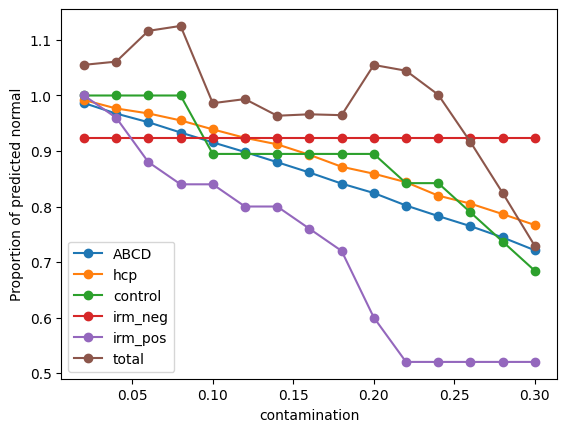

In [28]:
plt.plot(contamination, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(contamination, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(contamination, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(contamination, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(contamination, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(contamination, total, marker='o', linestyle='-', label="total")

plt.xlabel("contamination")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

ABOD

In [31]:
from pyod.models.abod import ABOD

In [33]:
contamination= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for a in contamination:
    print(a)
    clf = ABOD(contamination=a)
    clf.fit(X_ukb)

    y1 =1-  clf.predict(X_ukb)  #1=normal, 0= outlier
    y2 = 1- clf.predict(X_hcp)
    y3 = 1- clf.predict(X_control)
    y4 = 1-  clf.predict(X_neg)
    y5 = 1- clf.predict(X_pos)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos) 


0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16
0.18
0.19999999999999998
0.22
0.24
0.26
0.28
0.30000000000000004


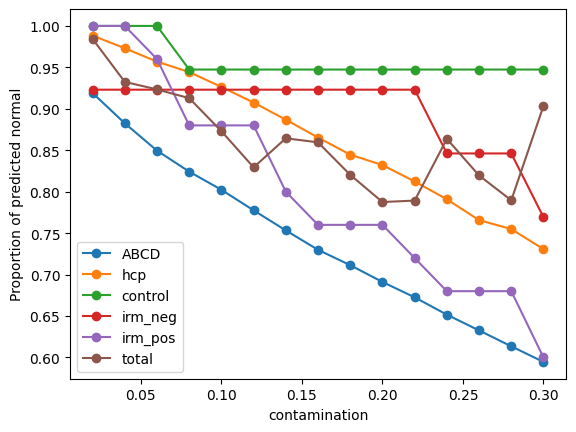

In [34]:
plt.plot(contamination, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(contamination, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(contamination, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(contamination, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(contamination, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(contamination, total, marker='o', linestyle='-', label="total")

plt.xlabel("contamination")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

UMAP 2D

In [35]:
reducer = umap.UMAP(n_components=2, random_state=42)
X1_umap2 = reducer.fit_transform(X_ukb)
X2_umap2 = reducer.transform(X_hcp)
X3_umap2= reducer.transform(X_control)
X4_umap2=reducer.transform(X_neg)
X5_umap2=reducer.transform(X_pos)

/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [36]:
nu= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for u in nu:
    print(u)
    clf = OneClassSVM(kernel='rbf', gamma='scale', nu=u)
    clf.fit(X1_umap2)

    y1 = clf.predict(X1_umap2)
    y2 = clf.predict(X2_umap2)
    y3 = clf.predict(X3_umap2)
    y4 = clf.predict(X4_umap2)
    y5 = clf.predict(X5_umap2)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos) 

0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16
0.18
0.19999999999999998
0.22
0.24
0.26
0.28
0.30000000000000004


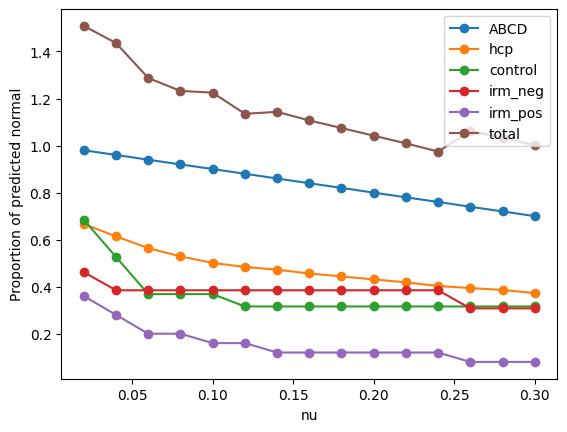

In [37]:
plt.plot(nu, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(nu, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(nu, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(nu, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(nu, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(nu, total, marker='o', linestyle='-', label="total")

plt.xlabel("nu")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

In [38]:
contamination= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for a in contamination:

    clf = IsolationForest(contamination=a, random_state=42)
    clf.fit(X1_umap2)

    y1 = clf.predict(X1_umap2)
    y2 = clf.predict(X2_umap2)
    y3 = clf.predict(X3_umap2)
    y4 = clf.predict(X4_umap2)
    y5 = clf.predict(X5_umap2)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos) 

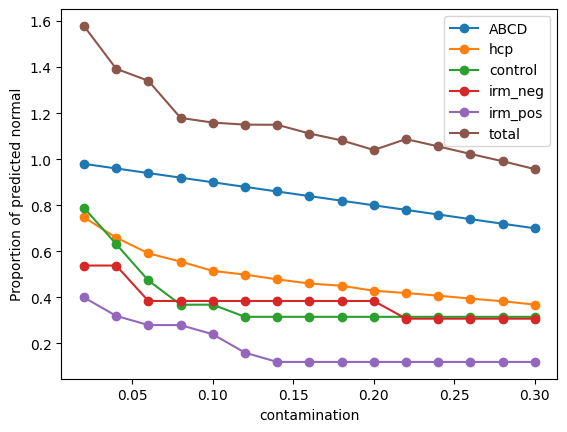

In [39]:
plt.plot(contamination, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(contamination, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(contamination, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(contamination, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(contamination, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(contamination, total, marker='o', linestyle='-', label="total")

plt.xlabel("contamination")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

In [40]:
contamination= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for a in contamination:

    lof = LocalOutlierFactor(contamination=a, novelty=True)
    lof.fit(X1_umap2)
    y1 = lof.predict(X1_umap2)
    y2 = lof.predict(X2_umap2)
    y3 = lof.predict(X3_umap2)
    y4 = lof.predict(X4_umap2)
    y5 = lof.predict(X5_umap2)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos) 


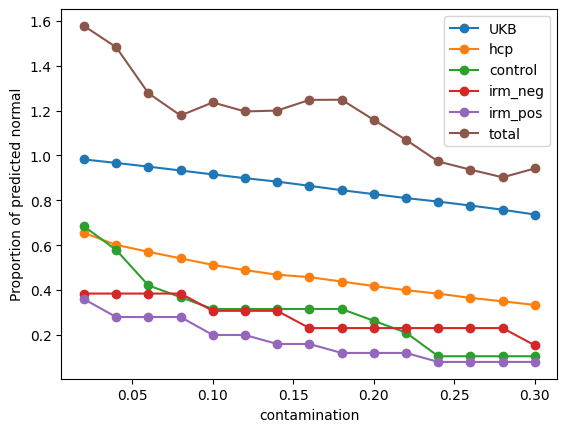

In [41]:
plt.plot(contamination, prop_positive_ABCD, marker='o', linestyle='-', label="UKB")
plt.plot(contamination, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(contamination, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(contamination, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(contamination, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(contamination, total, marker='o', linestyle='-', label="total")

plt.xlabel("contamination")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

In [42]:
contamination= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for a in contamination:
    print(a)
    clf = ABOD(contamination=a)
    clf.fit(X1_umap2)

    y1 =1-  clf.predict(X1_umap2)  #1=normal, 0= outlier
    y2 = 1- clf.predict(X2_umap2)
    y3 = 1- clf.predict(X3_umap2)
    y4 = 1-  clf.predict(X4_umap2)
    y5 = 1- clf.predict(X5_umap2)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos) 


0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16
0.18
0.19999999999999998
0.22
0.24
0.26
0.28
0.30000000000000004


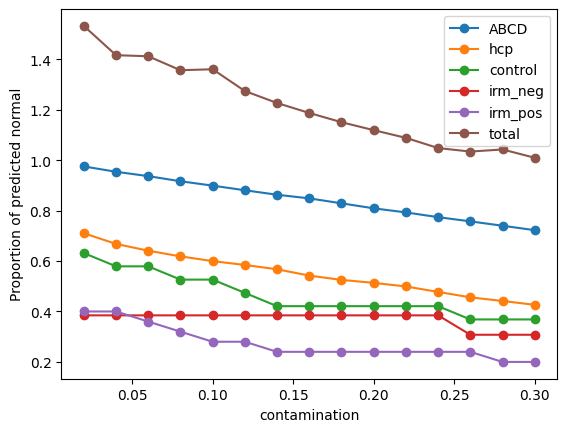

In [43]:
plt.plot(contamination, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(contamination, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(contamination, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(contamination, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(contamination, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(contamination, total, marker='o', linestyle='-', label="total")

plt.xlabel("contamination")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

UMAP 5D

In [44]:
reducer = umap.UMAP(n_components=5, random_state=42)
X1_umap5 = reducer.fit_transform(X_ukb)
X2_umap5 = reducer.transform(X_hcp)
X3_umap5= reducer.transform(X_control)
X4_umap5=reducer.transform(X_neg)
X5_umap5=reducer.transform(X_pos)

/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [45]:
nu= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for u in nu:
    print(u)
    clf = OneClassSVM(kernel='rbf', gamma='scale', nu=u)
    clf.fit(X1_umap5)

    y1 = clf.predict(X1_umap5)
    y2 = clf.predict(X2_umap5)
    y3 = clf.predict(X3_umap5)
    y4 = clf.predict(X4_umap5)
    y5 = clf.predict(X5_umap5)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos)

0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16
0.18
0.19999999999999998
0.22
0.24
0.26
0.28
0.30000000000000004


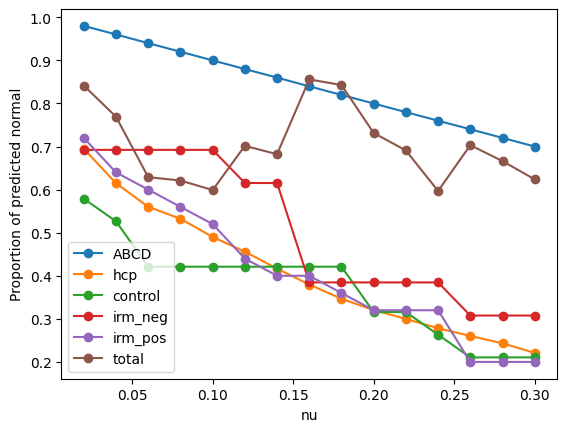

In [46]:
plt.plot(nu, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(nu, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(nu, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(nu, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(nu, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(nu, total, marker='o', linestyle='-', label="total")

plt.xlabel("nu")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

In [47]:
contamination= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for a in contamination:

    clf = IsolationForest(contamination=a, random_state=42)
    clf.fit(X1_umap5)

    y1 = clf.predict(X1_umap5)
    y2 = clf.predict(X2_umap5)
    y3 = clf.predict(X3_umap5)
    y4 = clf.predict(X4_umap5)
    y5 = clf.predict(X5_umap5)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos)

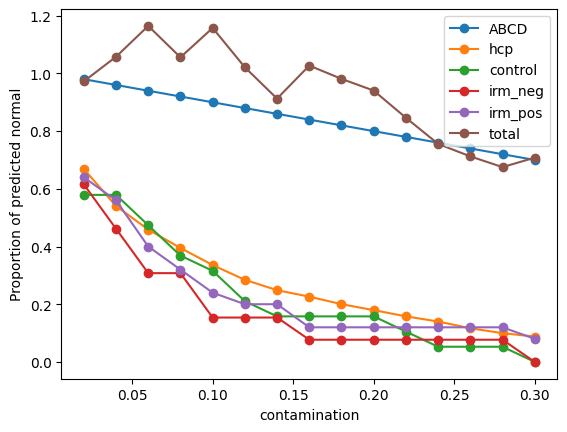

In [48]:
plt.plot(contamination, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(contamination, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(contamination, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(contamination, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(contamination, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(contamination, total, marker='o', linestyle='-', label="total")

plt.xlabel("contamination")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

In [49]:
contamination= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []

for a in contamination:

    lof = LocalOutlierFactor(contamination=a, novelty=True)
    lof.fit(X1_umap5)
    y1 = lof.predict(X1_umap5)
    y2 = lof.predict(X2_umap5)
    y3 = lof.predict(X3_umap5)
    y4 = lof.predict(X4_umap5)
    y5 = lof.predict(X5_umap5)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos) 

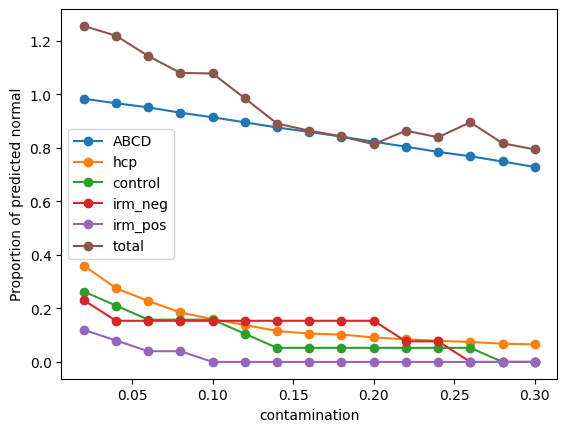

In [50]:
plt.plot(contamination, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(contamination, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(contamination, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(contamination, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(contamination, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(contamination, total, marker='o', linestyle='-', label="total")

plt.xlabel("contamination")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()

In [51]:
contamination= np.arange(0.02,0.31,0.02)

prop_positive_ABCD= []
prop_positive_hcp= []
prop_positive_control= []
prop_positive_neg= []
prop_positive_pos= []


for a in contamination:
    print(a)
    clf = ABOD(contamination=a)
    clf.fit(X1_umap5)

    y1 =1-  clf.predict(X1_umap5)  #1=normal, 0= outlier
    y2 = 1- clf.predict(X2_umap5)
    y3 = 1- clf.predict(X3_umap5)
    y4 = 1-  clf.predict(X4_umap5)
    y5 = 1- clf.predict(X5_umap5)

    prop_positive_ABCD.append(proportion_positive(y1))
    prop_positive_hcp.append(proportion_positive(y2))
    prop_positive_control.append(proportion_positive(y3))
    prop_positive_neg.append(proportion_positive(y4))
    prop_positive_pos.append(proportion_positive(y5))

total = np.array(prop_positive_ABCD)+np.array(prop_positive_hcp)+np.array(prop_positive_control)-np.array(prop_positive_neg)-np.array(prop_positive_pos)


0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16
0.18
0.19999999999999998
0.22
0.24
0.26
0.28
0.30000000000000004


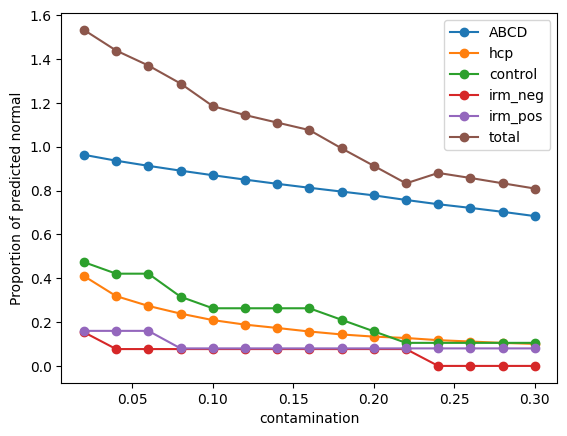

In [52]:
plt.plot(contamination, prop_positive_ABCD, marker='o', linestyle='-', label="ABCD")
plt.plot(contamination, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(contamination, prop_positive_control, marker='o', linestyle='-', label="control")
plt.plot(contamination, prop_positive_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(contamination, prop_positive_pos, marker='o', linestyle='-', label="irm_pos")
plt.plot(contamination, total, marker='o', linestyle='-', label="total")

plt.xlabel("contamination")
plt.ylabel("Proportion of predicted normal")
plt.legend()
plt.show()